# Capstone Project - The Vault

## Table of Contents


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#investigation">Dataset Investigation</a></li>
<li><a href="#dataanalysis"> Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='introduction'></a>
## Introduction

Using statistical analysis tools and visualizations available within Jupyter Notebook, I will run several tests and create several visualizations to show the need for The Vault based on the correlation between a woman's age, her BMI and her workout routine.  

### Hypothesis:
Women age 45 and older and having a BMI of 30 or higher either do not belong to a gym, or if they do, their time spent at the gym is less than others, and their exercise routine is not as long.

 - Null Hypothesis: There is no correlation between a woman's age and weight and their gym routines.  
 - Alternative Hypothesis: There is a negative correlation between a woman's age and weight and their gym routines.


<a id='investigation'></a>
## Dataset Investigation

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from scipy.stats import pearsonr

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('gym_members_exercise_tracking1.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [12]:
sum(df.duplicated())

0

There are 15 columns with 973 entries.  There are no missing values, each column has 973 non-null entries.  All data types are appropriate for the data contained.  There is not any duplicated data.

This is a very clean dataset, I don't see any need to change or alter any columns.

<a id='dataanalysis'></a>
## Data Analysis

There was no cleaning that needed to be done on this dataset.  Now it's time to start analyzing the data!

In [14]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

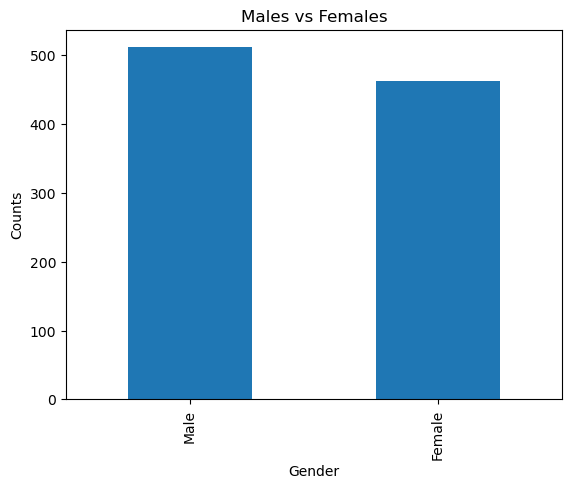

In [16]:
# bar chart of Men vs Women
df['Gender'].value_counts().plot(kind='bar');
plt.title('Males vs Females');
plt.ylabel('Counts');
plt.show();


There are 511 Men and 462 Women represented in this dataset.  I want to narrow down my data to just women so I can focus my analysis.

In [18]:
#Creating "dfw", a dataframe that only contains females
dfw = df[df['Gender'] == 'Female']
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 1 to 970
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            462 non-null    int64  
 1   Gender                         462 non-null    object 
 2   Weight (kg)                    462 non-null    float64
 3   Height (m)                     462 non-null    float64
 4   Max_BPM                        462 non-null    int64  
 5   Avg_BPM                        462 non-null    int64  
 6   Resting_BPM                    462 non-null    int64  
 7   Session_Duration (hours)       462 non-null    float64
 8   Calories_Burned                462 non-null    int64  
 9   Workout_Type                   462 non-null    object 
 10  Fat_Percentage                 462 non-null    float64
 11  Water_Intake (liters)          462 non-null    float64
 12  Workout_Frequency (days/week)  462 non-null    int64  


I now have my females only dataframe, containing 462 rows for the rest of my analysis.

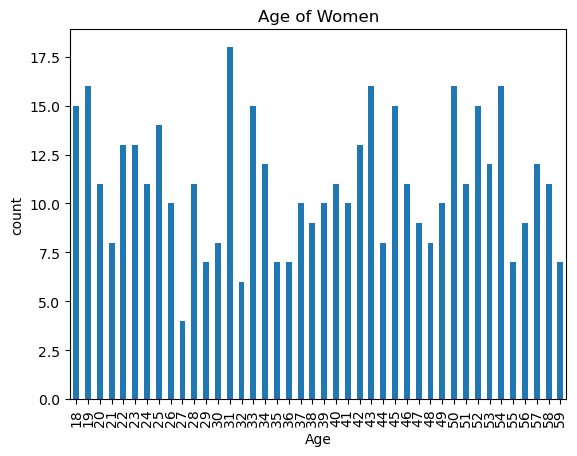

In [20]:
# bar chart of Women's Ages
age_counts = dfw['Age'].value_counts()
#sorted by age ascending order
age_counts = age_counts.sort_index()

age_counts.plot(kind='bar');
plt.title('Age of Women');
plt.ylabel('count');
plt.show();

In [22]:
#Split data based on age - find count of those below 45 versus those 45 and above
Threshold = 45

forty_five_plus = dfw[dfw['Age'] >= Threshold]
under_forty_five = dfw[dfw['Age'] < Threshold]

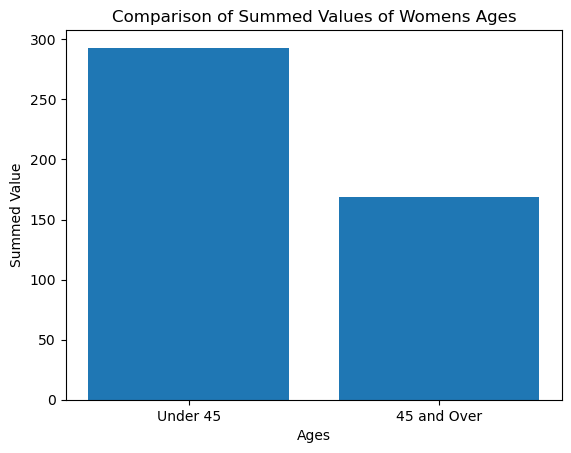

In [24]:
#plot this data

#age counts of forty_plus
age_counts = forty_five_plus['Age'].value_counts()
#total of those over forty
M_age_counts = age_counts.sum()

#age counts of under_forty
age_counts = under_forty_five['Age'].value_counts()
#total of those under forty
L_age_counts = age_counts.sum()

plt.bar(['Under 45', '45 and Over'], [L_age_counts, M_age_counts])
plt.xlabel('Ages')
plt.ylabel('Summed Value')
plt.title('Comparison of Summed Values of Womens Ages')
plt.show()

In [26]:
results = 100 - ((M_age_counts / L_age_counts) * 100)

print(f"There are {results:.2f}% more women who are under 45 years old than woman who are 45 and older.")

There are 42.32% more women who are under 45 years old than woman who are 45 and older.


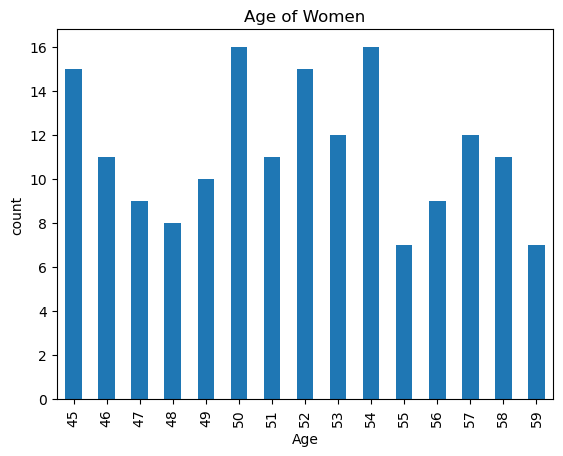

In [28]:
#find the count of women over 45 based on age
age_counts = forty_five_plus['Age'].value_counts()
#sorted by age ascending order
age_counts = age_counts.sort_index()

age_counts.plot(kind='bar');
plt.title('Age of Women');
plt.ylabel('count');
plt.show();

There is definitely a difference of the number of females who attend the gym that are under 45 versus over 45.  However, for those over 45 there isn't a distinct decline in numbers as the age increases.

In [30]:
#Scatterplot function

def myScatterPlot(dfw, xVar, yVar, title='Scatter Plot'):
    dfw.plot(kind='scatter', x=xVar, y=yVar, title=title)
    plt.show

In [32]:
dfw.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
5,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55
7,40,Female,69.7,1.51,189,141,64,1.27,895,Cardio,30.6,1.9,3,2,30.57
15,39,Female,42.5,1.75,181,131,52,1.13,740,Strength,26.2,2.1,2,1,13.88


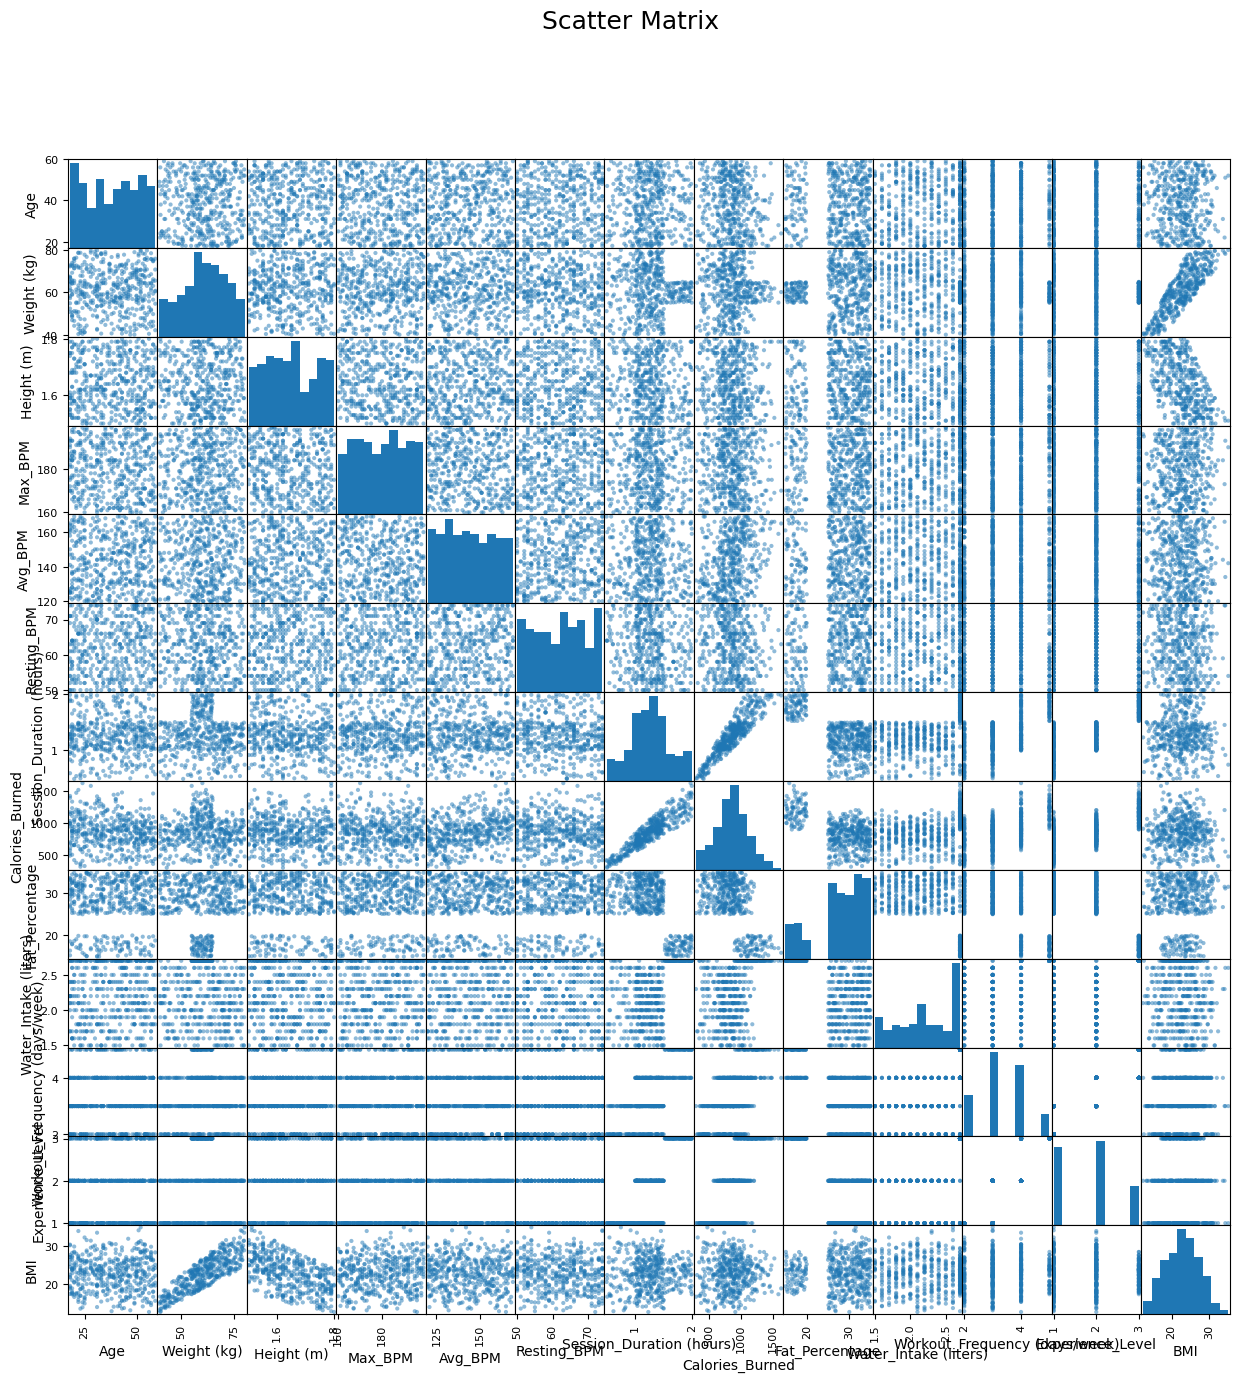

In [34]:
pd.plotting.scatter_matrix(dfw, figsize=(15, 15));
plt.suptitle('Scatter Matrix', fontsize = 18);

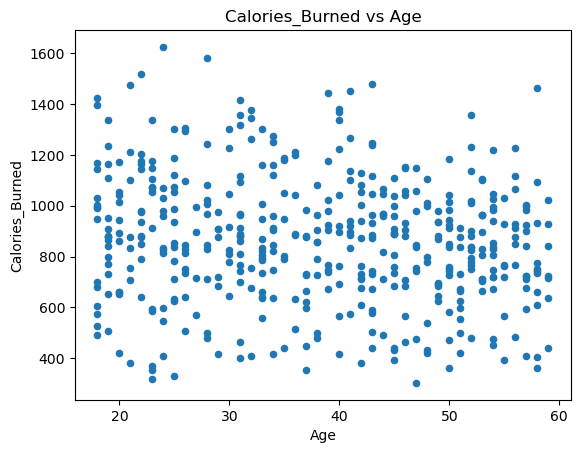

In [36]:
#Correlation between a women's age and her workout routine
myScatterPlot(dfw, 'Age', 'Calories_Burned', 'Calories_Burned vs Age')

In [38]:
corr, p_value = pearsonr(dfw['Age'], dfw['Calories_Burned'])

print(corr, p_value)

-0.14111948701324994 0.0023637445218101074


This tells me there is a very weak negative correlation between a woman's age and the quality of her workout session.  The very low p-value shows me that the results are statistically significant and unlikely to be due to chance.  

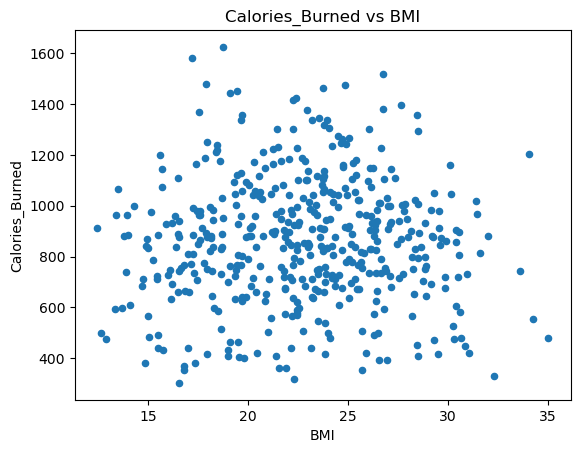

In [40]:
#Correlation between a women's BMI and her workout routine
myScatterPlot(dfw, 'BMI', 'Calories_Burned', 'Calories_Burned vs BMI')

In [42]:
corr, p_value = pearsonr(dfw['BMI'], dfw['Calories_Burned'])

print(corr, p_value)

0.01316212641256504 0.7778246580186471


This tells me there is a no linear correlation between a woman's BMI and the quality of her workout session. However, with the high p-value, this means that there is a 77.8% chance that these results happened by chance.

<a id='conclusions'></a>
## Conclusions

Comparing a womans age and calories burned:
 - There is a very weak negative correlation between a womans age and the quality of her workout session.
 - Low p-value (.002) tells me that the results are statisically signifcant and should reject the null hypothesis.

Comparing a womans BMI and calories burned:
 - There is no linear correlation between a woman's BMI and the quality of her workout session.
 - High p-value (.778) tells me that the results are not statisically signifcant and likely due to chance and I should not reject the null hypothesis.

Other findings:
There is a definite difference in numbers between women who are under 45 and those 45 and older.  
 - There are 42.32% more women who are under 45 who work out at this gym.